In [1]:
import sys
import os
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
from IPython import display
from IPython.display import clear_output
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit
from time import time
# from helpers import *
from OnlineBCA import *
np.random.seed(1500) # Seed for reproducibility
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

Below are the original source images


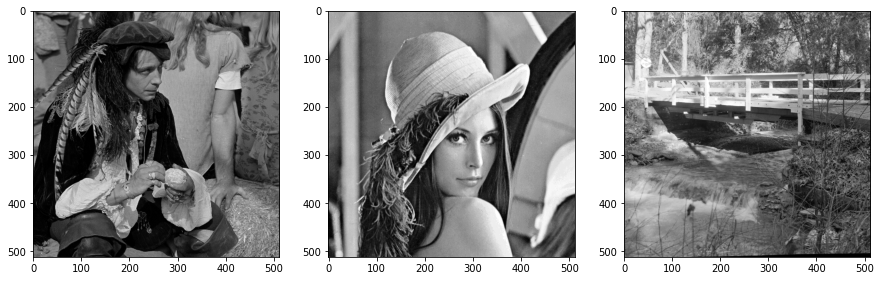

In [3]:
os.chdir("..")
os.chdir("./NumericalExperiments") # Change directory to read images
I = np.load('test_images.npy') ## I contains 4 images. 
S_ = I[:,0:3].T # Generate a source matrix from 3 images
print('Below are the original source images')
Subplot_gray_images(S_.T)

In [4]:
display_matrix(np.corrcoef(S_))

<IPython.core.display.Math object>

In [5]:
S = 2 * S_ - 1 # For sources to be antisparse
NumberofSources = 3
NumberofMixtures = 4
# Generate Mxr random mixing from i.i.d N(0,1)
A = np.random.randn(NumberofMixtures,NumberofSources)
X = np.dot(A,S)

SNR = 30 # dB
NoiseAmp = (10 ** (-SNR/20)) / np.sqrt(NumberofSources)
NoisePart = NoiseAmp * np.random.randn(X.shape[0], X.shape[1])
X = X + NoisePart
SNRinp = 10 * np.log10(np.sum(np.var(X, axis = 1)) / np.sum(np.var(NoisePart, axis = 1)))
print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 33.06152410107462


Below are the mixture signals


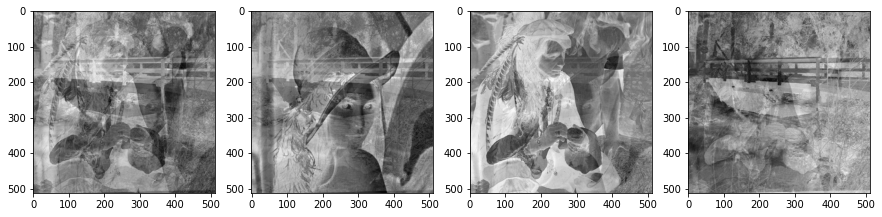

In [6]:
print('Below are the mixture signals')
Subplot_gray_images(X.T)

In [7]:
lambda_ = 0.99
mu_F = 1e-2/5
beta = 3
debug_iteration_point = 1000

model = OnlineBCA(s_dim = NumberofSources, x_dim = NumberofMixtures, 
                  lambda_ = lambda_, mu_F = mu_F, beta = beta, set_ground_truth = True, S = S, A = A)

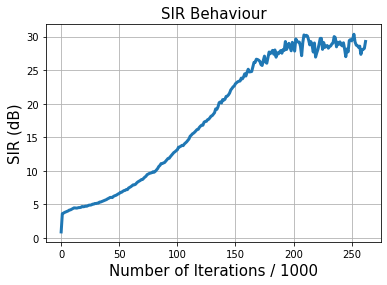

100%|█████████████████████████████████| 262144/262144 [00:45<00:00, 5785.71it/s]


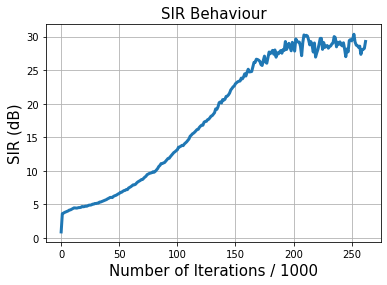

In [8]:
model.fit_batch_antisparse(X, n_epochs = 1, neural_dynamic_iterations = 150, 
                           shuffle = True, debug_iteration_point = debug_iteration_point,plot_in_jupyter = True)

In [9]:
Wf = model.compute_overall_mapping(return_mapping = True)
Y = Wf @ X
Y.shape, X.shape, S.shape

((3, 262144), (4, 262144), (3, 262144))

Below are the extracted signals


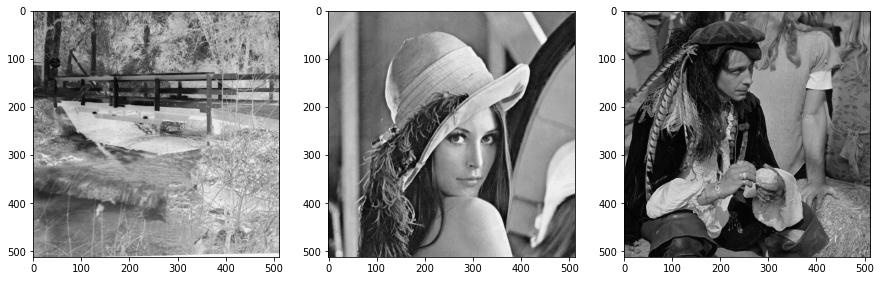

In [10]:
print('Below are the extracted signals') # Some sources might be negative due to sign and permutation ambiguity
Subplot_gray_images(Y.T)

In [11]:
Y_ = signed_and_permutation_corrected_sources(S.T,Y.T).T

Below are the sign and permutation corrected signals


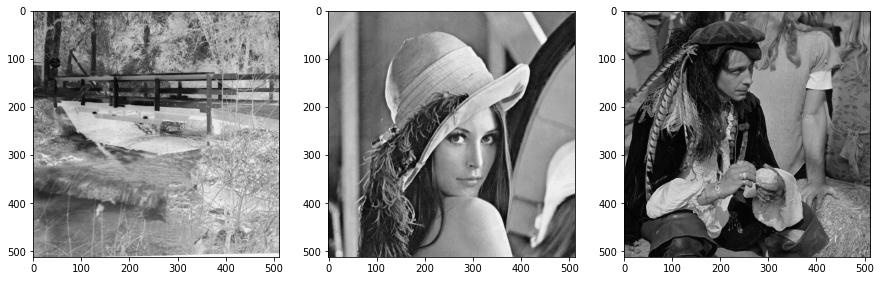

In [12]:
print('Below are the sign and permutation corrected signals')
Subplot_gray_images(Y.T)